# Autonomous Driving Project

### This project will focus on implementing a basic/primitive version of autonomous driving using Stable Baselines 3.

# 1. Install/Import Dependencies

You will first need to setup SWIG.

`pip install swig`

Then gymnasium box2d

`pip install gymnasium[box2d]`

This will result in the following error:

`error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/`

Proceed to https://visualstudio.microsoft.com/visual-cpp-build-tools/

Download Build Tools

Launch Installer

Select `Desktop development with C++`

![MS Build Tools.PNG](<attachment:MS Build Tools.PNG>)

Select Install

Once Complete

Run

`pip install gymnasium[box2d]`
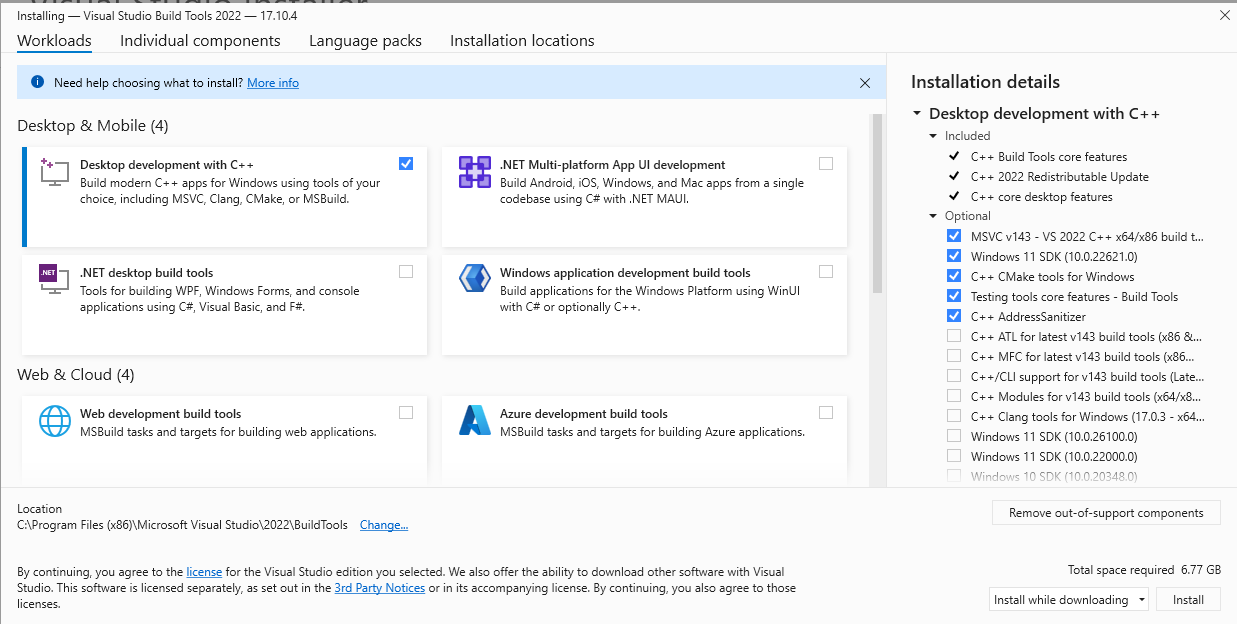

In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
import os

# 2. Test Environment

In [2]:
environment_name = 'CarRacing-v2'
env = gym.make(environment_name)

In [3]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})


Action Space 

`Box([-1. 0. 0.], 1.0, (3,), float32)`

In [4]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

Observation Space 

`Box(0, 255, (96, 96, 3), uint8)`

In [5]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

In [6]:
env.close()

# 3. Train Model

In [7]:
log_path = os.path.join("Training", "Logs")
save_path = os.path.join("Training", "Saved Models")

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [8]:
model.learn(total_timesteps=100000)

PPO_Driving_path = os.path.join("Training", "Saved Models", "PPO_Driving_model")
model.save(PPO_Driving_path)

Logging to Training\Logs\PPO_20
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -50.4    |
| time/              |          |
|    fps             | 78       |
|    iterations      | 1        |
|    time_elapsed    | 26       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -51.6       |
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 2           |
|    time_elapsed         | 66          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006199228 |
|    clip_fraction        | 0.078       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | -0.00866    

# 4. Save Model

# 5. Evaluate and Test